In [1]:

import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# We'll compare 2 stocks to the S&P500 on the basis of normalised series
tickers = ['AAPL', 'MSFT']
prices_df = pd.read_csv('data/stock_data/msft_aapl.csv', parse_dates=['date'], index_col='date')
prices_df.head()

,AAPL,MSFT
date,,
2007-01-03,11.97,29.86
2007-01-04,12.24,29.81
2007-01-05,12.15,29.64
2007-01-08,12.21,29.93
2007-01-09,13.22,29.96


In [3]:

sp500_df = pd.read_csv('data/stock_data/sp500.csv', parse_dates=['date'], index_col='date')
sp500_df.head()

,SP500
date,
2007-06-29,1503.35
2007-07-02,1519.43
2007-07-03,1524.87
2007-07-05,1525.40
2007-07-06,1530.44


In [4]:
data = pd.concat([prices_df, sp500_df], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2007-01-03 to 2016-12-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2517 non-null   float64
 1   MSFT    2517 non-null   float64
 2   SP500   2395 non-null   float64
dtypes: float64(3)
memory usage: 78.7 KB


In [5]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2394 entries, 2007-06-29 to 2016-12-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2394 non-null   float64
 1   MSFT    2394 non-null   float64
 2   SP500   2394 non-null   float64
dtypes: float64(3)
memory usage: 74.8 KB


In [6]:

first_values = data.iloc[0]
data_normalised_df = data.div(first_values).mul(100)
data_normalised_df.head()

,AAPL,MSFT,SP500
date,,,
2007-06-29,100.000000,100.000000,100.000000
2007-07-02,99.368904,100.916186,101.069611
2007-07-03,104.245554,101.866305,101.431470
2007-07-05,108.777969,101.764506,101.466724
2007-07-06,108.433735,101.696641,101.801976


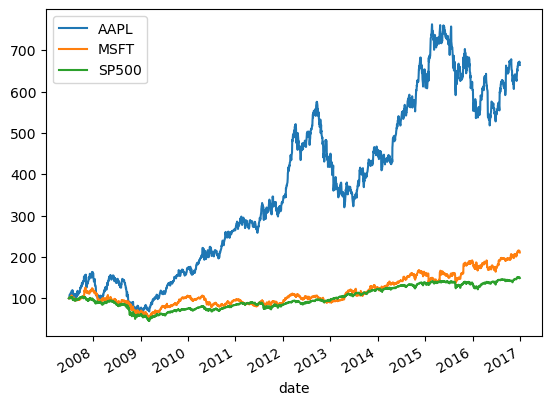

In [7]:
data_normalised_df.plot()
plt.show()

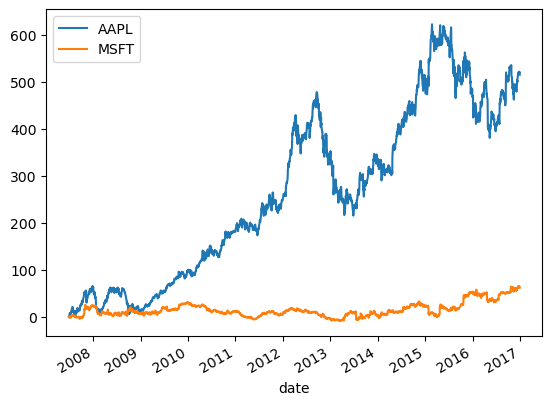

In [8]:

# Compare each stock's difference to the S&P500 benchmark
diff = data_normalised_df[tickers].sub(data_normalised_df['SP500'], axis=0)
diff.plot()
plt.show()